In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

path = "C:\\Users\\apidb\\OneDrive\\Bureau\\Copulas - Copy\\df_saved\\df.pkl"
df = pd.read_pickle(path, compression="gzip")

In [17]:
random_sampled_df = df.sample(n=28633, replace=True, random_state=None)

In [13]:

random_sampled_df

,policy_year,gender,frequency_group,severity_group,age_range,nb_conjoints,age_range_18,exposure,quantity,cost,beneficiary_relationship_child,beneficiary_relationship_policyholder,beneficiary_relationship_spouse
10995,2017.0,1.0,5.0,7.0,7.0,0.0,7.0,1.2384,0.0,0.00,0.0,1.0,0.0
13940,2018.0,1.0,1.0,7.0,12.0,0.0,12.0,1.0000,0.0,0.00,0.0,1.0,0.0
19505,2019.0,1.0,5.0,1.0,6.0,1.0,7.0,1.9973,1.0,6.24,0.0,1.0,0.0
11875,2017.0,0.0,3.0,1.0,4.0,0.0,5.0,0.2438,0.0,0.00,0.0,1.0,0.0
5886,2017.0,1.0,5.0,5.0,10.0,1.0,11.0,0.2438,2.0,3.65,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,2016.0,1.0,8.0,1.0,1.0,0.0,2.0,1.4493,0.0,0.00,1.0,0.0,0.0
9285,2019.0,1.0,4.0,2.0,9.0,1.0,9.0,7.5781,7.0,421.82,0.0,1.0,0.0
4677,2018.0,1.0,5.0,2.0,7.0,1.0,7.0,30.8329,27.0,881.27,0.0,1.0,0.0
16727,2017.0,1.0,6.0,10.0,3.0,0.0,4.0,0.0685,0.0,0.00,0.0,1.0,0.0


In [12]:
n_components_range = range(1, 11)
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(df)
    aic_scores.append(gmm.aic(df))

In [13]:
n_components_range = range(1, 11)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(df)
    aic_scores.append(gmm.bic(df))

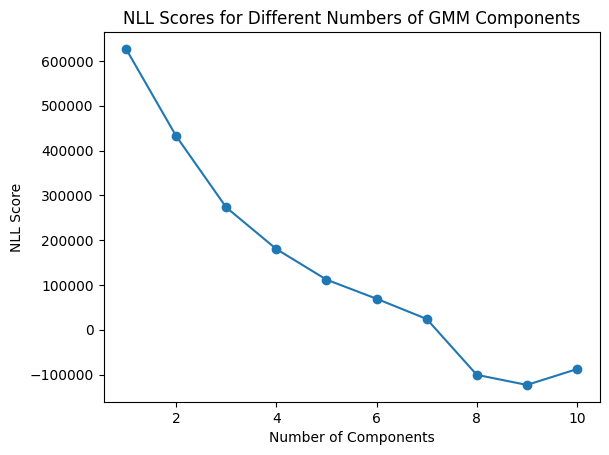

In [16]:
nll_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(df)
    log_likelihood = gmm.score_samples(df)
    nll = -np.sum(log_likelihood)
    nll_scores.append(nll)


plt.plot(n_components_range, nll_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('NLL Score')
plt.title('NLL Scores for Different Numbers of GMM Components')
plt.show()

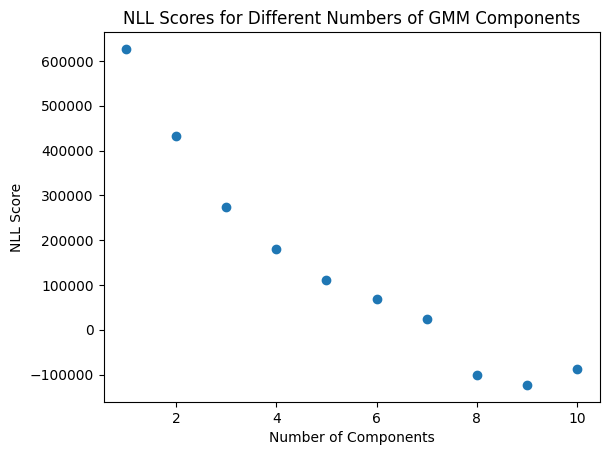

: 

In [17]:
plt.scatter(n_components_range, nll_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('NLL Score')
plt.title('NLL Scores for Different Numbers of GMM Components')
plt.show()

In [ ]:
plt.plot(n_components_range, nll_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('NLL Score')
plt.title('NLL Scores for Different Numbers of GMM Components')
plt.show()

In [10]:
aic_scores

[1254835.3058910437,
 866695.0038599136,
 549151.3487087326,
 364400.70664332417,
 228982.50456969786,
 144674.76927827444,
 55592.64924704219,
 -192833.03681283543,
 -236802.6192679395,
 -165083.83139421698]

ValueError: x and y must be the same size

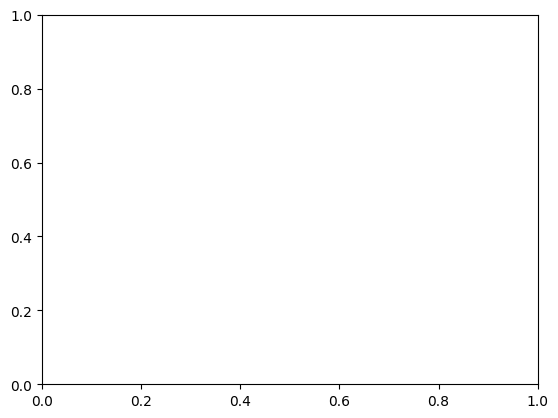

In [15]:
plt.scatter(n_components_range, aic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC Score')
plt.title('AIC Scores for Different Numbers of GMM Components')
plt.show()

In [9]:
copuladf = pd.read_pickle("C:\\Users\\apidb\\OneDrive\\Bureau\\Copulas - Copy\\samples_N_28633.pkl",compression="gzip")

In [18]:
import pandas as pd
from scipy.stats import kendalltau
tau, p_value = kendalltau(random_sampled_df['quantity'], random_sampled_df['cost'])

print(f"Kendall's Tau: {tau}")
print(f"P-value: {p_value}")

Kendall's Tau: 0.9064026480099174
P-value: 0.0


In [25]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
r, p_value = pearsonr(copuladf['quantity'], copuladf['cost'])

print(f"Pearson's Correlation Coefficient: {r}")
print(f"P-value: {p_value}")

Pearson's Correlation Coefficient: 0.907312202624956
P-value: 0.0


In [26]:
pearson_corr_matrix_real = df.corr(method='pearson')
pearson_corr_matrix_synthetic = copuladf.corr(method='pearson')

In [29]:
absolute_differences = np.abs(pearson_corr_matrix_real - pearson_corr_matrix_synthetic)
mean_error = np.mean(absolute_differences)

In [30]:

mean_error


0.05365474103114856

In [31]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8, random_state=42)
gmm.fit(df)

GaussianMixture(n_components=8, random_state=42)

In [59]:
df_gmm = gmm.sample(n_samples=28633)[0]

In [60]:
df_gmm = pd.DataFrame(df_gmm, columns=df.columns)

In [61]:
df_gmm[df_gmm["cost"] < 0]

,policy_year,gender,frequency_group,severity_group,age_range,nb_conjoints,age_range_18,exposure,quantity,cost,beneficiary_relationship_child,beneficiary_relationship_policyholder,beneficiary_relationship_spouse
0,2016.884894,-0.252615,1.332520,10.326593,4.721199,0.707765,5.684909,1.955916,0.000072,-0.001425,0.293046,0.464517,0.243053
2,2017.883439,0.169041,7.626620,2.926980,9.191036,1.493549,9.662378,1.273897,0.000342,-0.001763,-0.494795,1.055430,0.439800
3,2018.756321,0.836780,7.421063,5.903628,6.251126,0.933240,7.174112,0.195038,-0.000176,-0.001106,0.068532,0.756572,0.176268
5,2017.296423,-0.299656,0.254590,4.176766,6.347671,1.035784,6.507038,0.763897,0.000326,-0.000530,-0.037131,-0.015491,1.052651
6,2017.197222,1.073318,3.478534,1.523308,4.848096,0.694985,5.167920,1.607923,-0.001413,-0.000421,0.305615,0.896240,-0.201527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28606,2019.318788,1.204775,2.527423,0.617332,3.197027,0.320593,3.760035,-3.711069,11.689459,-835.104547,0.679309,0.831939,-0.513038
28612,2016.546927,1.075725,9.310796,1.908195,5.221066,0.729435,5.494061,-90.323510,-119.080352,-3684.902580,0.270184,0.776703,-0.048678
28622,2017.490929,1.398962,8.227414,-3.134998,4.430676,0.622893,3.861582,-1.499279,-46.425777,-5187.910480,0.378883,0.996122,-0.374562
28625,2016.328945,1.189544,12.138978,1.825694,4.723541,0.664600,4.145401,36.373356,-33.182831,-820.079816,0.333410,1.423802,-0.761148


In [57]:
df_copula = copuladf

In [58]:
df_original = df

In [68]:
df_copula["gender"] = df_copula["gender"].round(0)
df_copula["frequency_group"] = df_copula["frequency_group"].round(0)
df_copula["severity_group"] = df_copula["severity_group"].round(0)
df_copula["nb_conjoints"] = df_copula["nb_conjoints"].round(0)
df_copula["policy_year"] = df_copula["policy_year"].round(0)
df_copula.loc[df_copula["quantity"] < 0,"quantity"] = 0
df_copula.loc[df_copula["cost"] < 0,"cost"] = 0

In [74]:
df_gmm["gender"] = df_gmm["gender"].round(0)
df_gmm["frequency_group"] = df_gmm["frequency_group"].round(0)
df_gmm["severity_group"] = df_gmm["severity_group"].round(0)
df_gmm["nb_conjoints"] = df_gmm["nb_conjoints"].round(0)
df_gmm["policy_year"] = df_gmm["policy_year"].round(0)
df_gmm.loc[df_gmm["quantity"] < 0,"quantity"] = 0
df_gmm.loc[df_gmm["cost"] < 0,"cost"] = 0

In [43]:

kendall_original = df_original.corr(method='kendall')
kendall_copula = df_copula.corr(method='kendall')
kendall_gmm = df_gmm.corr(method='kendall')


spearman_original = df_original.corr(method='spearman')
spearman_copula = df_copula.corr(method='spearman')
spearman_gmm = df_gmm.corr(method='spearman')


pearson_original = df_original.corr(method='pearson')
pearson_copula = df_copula.corr(method='pearson')
pearson_gmm = df_gmm.corr(method='pearson')


kendall_error_copula = np.abs(kendall_original - kendall_copula).mean().mean()
kendall_error_gmm = np.abs(kendall_original - kendall_gmm).mean().mean()


spearman_error_copula = np.abs(spearman_original - spearman_copula).mean().mean()
spearman_error_gmm = np.abs(spearman_original - spearman_gmm).mean().mean()


pearson_error_copula = np.abs(pearson_original - pearson_copula).mean().mean()
pearson_error_gmm = np.abs(pearson_original - pearson_gmm).mean().mean()


print(f"Kendall Mean Error (Copula vs Original): {kendall_error_copula}")
print(f"Kendall Mean Error (GMM vs Original): {kendall_error_gmm}")
print(f"Spearman Mean Error (Copula vs Original): {spearman_error_copula}")
print(f"Spearman Mean Error (GMM vs Original): {spearman_error_gmm}")
print(f"Pearson Mean Error (Copula vs Original): {pearson_error_copula}")
print(f"Pearson Mean Error (GMM vs Original): {pearson_error_gmm}")



Kendall Mean Error (Copula vs Original): 0.031569867402974544
Kendall Mean Error (GMM vs Original): 0.04245590176796933
Spearman Mean Error (Copula vs Original): 0.018883809515235404
Spearman Mean Error (GMM vs Original): 0.0322562721420964
Pearson Mean Error (Copula vs Original): 0.05592112162795063
Pearson Mean Error (GMM vs Original): 0.009273822285627668


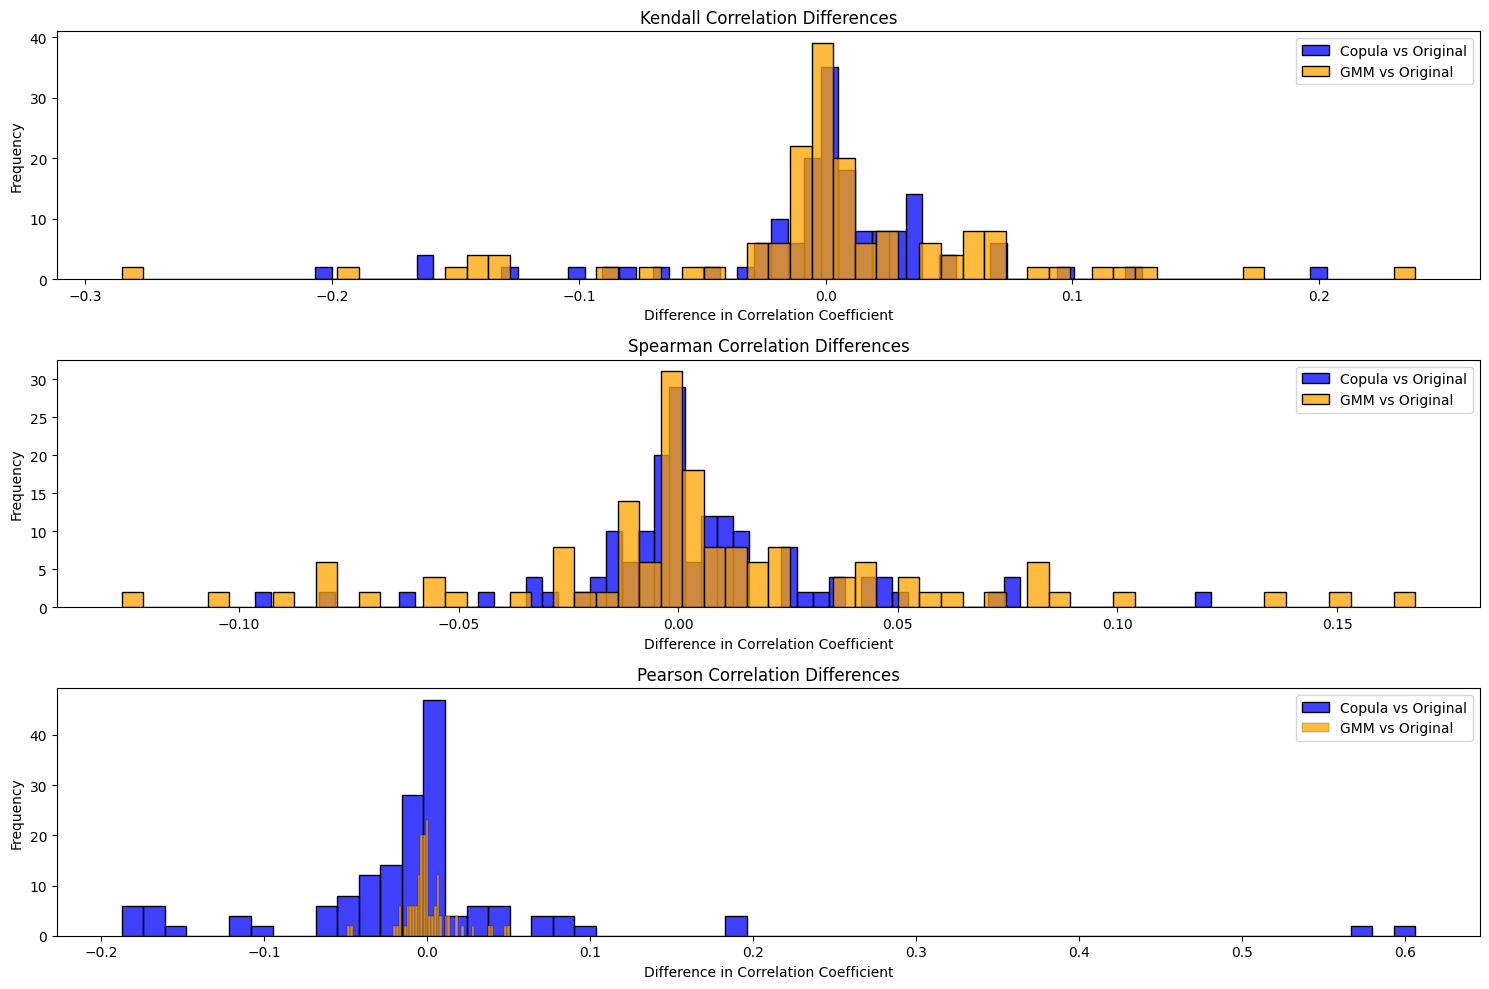

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

kendall_diff_copula = (kendall_original - kendall_copula).stack()
kendall_diff_gmm = (kendall_original - kendall_gmm).stack()

spearman_diff_copula = (spearman_original - spearman_copula).stack()
spearman_diff_gmm = (spearman_original - spearman_gmm).stack()

pearson_diff_copula = (pearson_original - pearson_copula).stack()
pearson_diff_gmm = (pearson_original - pearson_gmm).stack()

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.histplot(kendall_diff_copula, bins=60, color='blue', label='Copula vs Original', kde=False)
sns.histplot(kendall_diff_gmm, bins=60, color='orange', label='GMM vs Original', kde=False)
plt.title('Kendall Correlation Differences')
plt.xlabel('Difference in Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(3, 1, 2)
sns.histplot(spearman_diff_copula, bins=60, color='blue', label='Copula vs Original', kde=False)
sns.histplot(spearman_diff_gmm, bins=60, color='orange', label='GMM vs Original', kde=False)
plt.title('Spearman Correlation Differences')
plt.xlabel('Difference in Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(3, 1, 3)
sns.histplot(pearson_diff_copula, bins=60, color='blue', label='Copula vs Original', kde=False)
sns.histplot(pearson_diff_gmm, bins=60, color='orange', label='GMM vs Original', kde=False)
plt.title('Pearson Correlation Differences')
plt.xlabel('Difference in Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [73]:
df_copula

,policy_year,gender,frequency_group,severity_group,age_range,nb_conjoints,age_range_18,exposure,quantity,cost,beneficiary_relationship_child,beneficiary_relationship_policyholder,beneficiary_relationship_spouse
0,2018.035733,0.0,10.0,7.0,1.025449,1.0,2.070358,0.046982,0.000000,0.000000,-0.013707,-0.082880,1.100501
1,2019.082461,1.0,2.0,2.0,3.011997,-0.0,3.682399,1.689721,0.000000,0.000000,0.852443,0.014264,0.020687
2,2015.992114,0.0,5.0,2.0,6.129750,0.0,6.264750,1.270752,1.116612,79.747754,0.985894,-0.048030,0.071835
3,2016.013705,1.0,9.0,3.0,6.239230,0.0,5.720380,2.206155,2.118435,39.243999,-0.025922,1.062243,-0.038085
4,2018.028539,0.0,4.0,7.0,4.540267,1.0,4.179495,5.015854,7.466618,253.479478,0.030252,0.040669,0.055287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28628,2016.905670,1.0,5.0,2.0,-0.091756,-0.0,-0.506103,678.702310,112.265912,3293.947828,0.098864,0.090263,-0.010274
28629,2017.942515,1.0,3.0,2.0,4.706479,1.0,5.008289,0.548847,0.000000,0.000000,0.022488,0.975893,-0.013340
28630,2018.964144,0.0,4.0,2.0,2.807282,0.0,4.008806,0.356938,0.413293,28.853773,0.071784,0.004248,0.045257
28631,2018.832784,0.0,5.0,1.0,11.555746,1.0,11.906361,1.012093,0.870907,0.000000,0.007762,1.009680,-0.024925


In [76]:
print(stats_original)
print(stats_copula)
print(stats_gmm)

                                              Mean     Median  1st Quartile  \
policy_year                            2017.513149  2018.0000        2017.0   
gender                                    0.549541     1.0000           0.0   
frequency_group                           5.859393     5.0000           4.0   
severity_group                            3.873712     3.0000           2.0   
age_range                                 5.459644     5.0000           3.0   
nb_conjoints                              0.545315     1.0000           0.0   
age_range_18                              5.752628     6.0000           4.0   
exposure                                  6.985162     1.9151           1.0   
quantity                                  6.417770     1.0000           0.0   
cost                                    319.471557    25.0000           0.0   
beneficiary_relationship_child            0.160828     0.0000           0.0   
beneficiary_relationship_policyholder     0.560123  

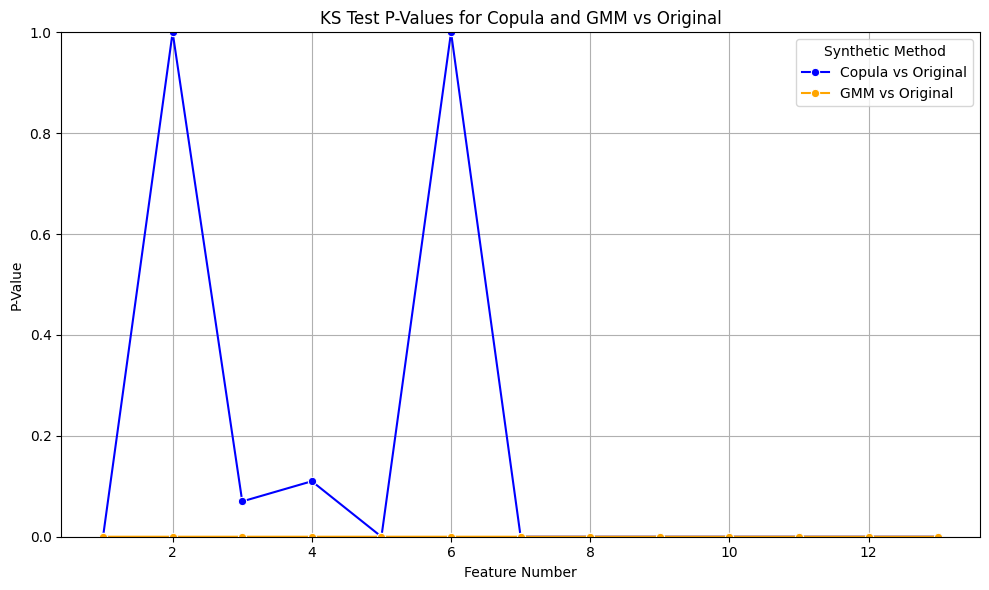

In [88]:
from scipy.stats import ks_2samp

def perform_ks_test(original, synthetic):
    p_values = {}
    for column in original.columns:
        _, p_value = ks_2samp(original[column], synthetic[column])
        p_values[column] = p_value
    return p_values

ks_pvalues_copula = perform_ks_test(df_original, df_copula)
ks_pvalues_gmm = perform_ks_test(df_original, df_gmm)

ks_results_copula = pd.DataFrame.from_dict(ks_pvalues_copula, orient='index', columns=['P-Value'])
ks_results_gmm = pd.DataFrame.from_dict(ks_pvalues_gmm, orient='index', columns=['P-Value'])


ks_results_copula['Feature'] = ks_results_copula.index.map(feature_mapping)
ks_results_gmm['Feature'] = ks_results_gmm.index.map(feature_mapping)


plt.figure(figsize=(10, 6))

sns.lineplot(data=ks_results_copula, x='Feature', y='P-Value', marker='o', linestyle='-', color='blue', label='Copula vs Original')

sns.lineplot(data=ks_results_gmm, x='Feature', y='P-Value', marker='o', linestyle='-', color='orange', label='GMM vs Original')

plt.title('KS Test P-Values for Copula and GMM vs Original')
plt.ylabel('P-Value')
plt.xlabel('Feature Number')
plt.ylim(0, 1)  
plt.legend(title='Synthetic Method')
plt.grid(True)

plt.tight_layout()
plt.show()

In [89]:
df_original

,policy_year,gender,frequency_group,severity_group,age_range,nb_conjoints,age_range_18,exposure,quantity,cost,beneficiary_relationship_child,beneficiary_relationship_policyholder,beneficiary_relationship_spouse
0,2016.0,0.0,3.0,1.0,1.0,0.0,1.0,20.9068,19.0,493.82,1.0,0.0,0.0
1,2017.0,0.0,3.0,1.0,1.0,0.0,2.0,5.1370,5.0,166.64,1.0,0.0,0.0
2,2017.0,0.0,3.0,1.0,1.0,0.0,1.0,13.8219,13.0,378.35,1.0,0.0,0.0
3,2016.0,1.0,3.0,1.0,1.0,0.0,0.0,13.0877,6.0,166.41,1.0,0.0,0.0
4,2017.0,1.0,3.0,1.0,1.0,0.0,0.0,7.9205,2.0,70.73,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28628,2016.0,0.0,6.0,2.0,10.0,1.0,10.0,1.0000,0.0,0.00,0.0,0.0,1.0
28629,2017.0,0.0,6.0,2.0,10.0,1.0,10.0,0.9973,0.0,0.00,0.0,0.0,1.0
28630,2019.0,0.0,11.0,3.0,11.0,1.0,12.0,1.0000,4.0,130.00,0.0,0.0,1.0
28631,2018.0,0.0,4.0,5.0,10.0,1.0,11.0,1.0000,0.0,0.00,0.0,0.0,1.0


In [83]:
ks_pvalues_copula

{'policy_year': 3.403911937256228e-213,
 'gender': 1.0,
 'frequency_group': 0.007841724266962282,
 'severity_group': 0.00011670628721181942,
 'age_range': 5.998898052044333e-44,
 'nb_conjoints': 1.0,
 'age_range_18': 6.753071991560948e-44,
 'exposure': 3.2702746334379982e-165,
 'quantity': 0.0,
 'cost': 1.4446466894556434e-244,
 'beneficiary_relationship_child': 0.0,
 'beneficiary_relationship_policyholder': 0.0,
 'beneficiary_relationship_spouse': 0.0,
 'Feature3': 0.07,
 'Feature8': 0.1,
 'Feature10': 0.08}